<a href="https://colab.research.google.com/github/001ckk/Moringa-week-4-IP/blob/main/Moringa_Data_Science_Prep_W4_Independent_Project_2022_04_Christopher_Kimani_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np 
import pandas as pd 


In [ ]:
df = pd.read_csv('Autolib_dataset (2) (1).csv')
df.info()
df.head(10)

In [31]:
# Checking missing values

num_rows = df.shape[0]
num_missing = num_rows - df.count() 
num_missing

address                0
cars                   0
bluecar_counter        0
utilib_counter         0
utilib_1.4_counter     0
charge_slots           0
charging_status        0
city                   0
id                     0
kind                   0
geo_point              0
postal_code            0
public_name            0
rental_status          0
slots                  0
station_type           0
status                 0
subscription_status    0
year                   0
month                  0
day                    0
hour                   0
minute                 0
dtype: int64

In [ ]:
# dropping two columns (Displayed comment and Scheduled at) since they do not contain any information.
# the two columns do not contain any meaningful information. 

df.drop(['Displayed comment','Scheduled at'],axis = True, inplace = True )
df.shape

In [ ]:
# Adjusting the column names 

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
df

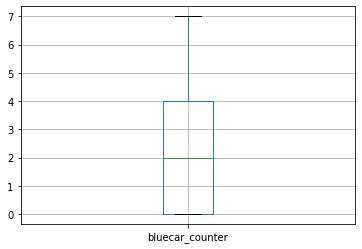

In [105]:
# Checking for outliers in the bluecar_counter column 

df.boxplot(column =['bluecar_counter'], grid = True) 

# Counclusion 
# There were no outliers for this outcome.

In [ ]:
# Checking and dropping duplicates if there are any.

df_clean =  df.drop_duplicates()
df_clean 

# This is our clean data that we will use for analysis


In [ ]:
df.columns.values.tolist()

In [40]:
# Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.
# Columns required: bluecar_counter, hour, day, city, month, year 

df1 = df[['bluecar_counter','hour','day', 'city','month','year']]
df1.shape

(5000, 6)

In [45]:
# Conditions 
# City = Paris 
# Month = April 
# Year = 2018

df2 = df1.loc[(df1['city'] == 'Paris') & (df1['month'] == 4) & (df1['year'] == 2018)]
df2

,bluecar_counter,hour,day,city,month,year
0,0,11,8,Paris,4,2018
1,6,7,6,Paris,4,2018
3,3,4,4,Paris,4,2018
4,3,17,8,Paris,4,2018
5,0,7,6,Paris,4,2018
...,...,...,...,...,...,...
4992,0,23,9,Paris,4,2018
4994,0,20,1,Paris,4,2018
4996,4,16,4,Paris,4,2018
4997,1,7,1,Paris,4,2018


In [117]:
# Arranging the days from the first day to the last day (ascending order)
# This shows for each day 

df2.sort_values(by = 'day').head(5)

,bluecar_counter,hour,day,city,month,year
1777,0,1,1,Paris,4,2018
855,2,9,1,Paris,4,2018
1054,0,2,1,Paris,4,2018
3757,5,3,1,Paris,4,2018
1055,1,4,1,Paris,4,2018


In [119]:
# The sum of green cars orderd per day 

df3 = df.groupby(['day','hour'])['bluecar_counter'].sum()
df3.head

<bound method NDFrame.head of day  hour
1    0       73
     1       51
     2       58
     3       56
     4       61
             ..
9    19      51
     20      56
     21      92
     22      69
     23      51
Name: bluecar_counter, Length: 213, dtype: int64>

In [111]:
# the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.


df3 = df.groupby(['hour'])['bluecar_counter'].sum()
df3.head


# The most popular hour of the day in the whole month is the hour with the highest (sum) of green cars.
# this is the 6th hour with 608 ordered cars over the whole month.

<bound method NDFrame.head of hour
0     483
1     493
2     559
3     549
4     512
5     552
6     608
7     555
8     472
9     515
10    475
11    502
12    491
13    537
14    418
15    449
16    463
17    432
18    427
19    387
20    411
21    503
22    441
23    434
Name: bluecar_counter, dtype: int64>

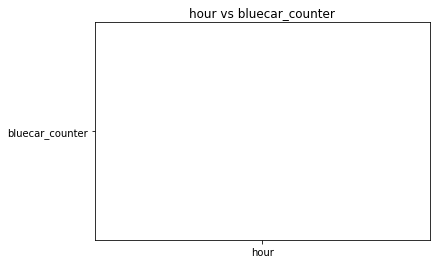

In [115]:
import matplotlib.pyplot as plt

plt.bar('hour','bluecar_counter', color ='blue',
        width = 0.4)
 
plt.title("hour vs bluecar_counter")
plt.show()